<a href="https://colab.research.google.com/github/JirayuL/fish_and_overfishing/blob/main/Fish_and_Overfishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload the file
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Replace this path with your actual file path
file_path = '/content/drive/MyDrive/Data Visualization/data/Fish and Overfishing/capture-fisheries-vs-aquaculture.csv'

Mounted at /content/drive


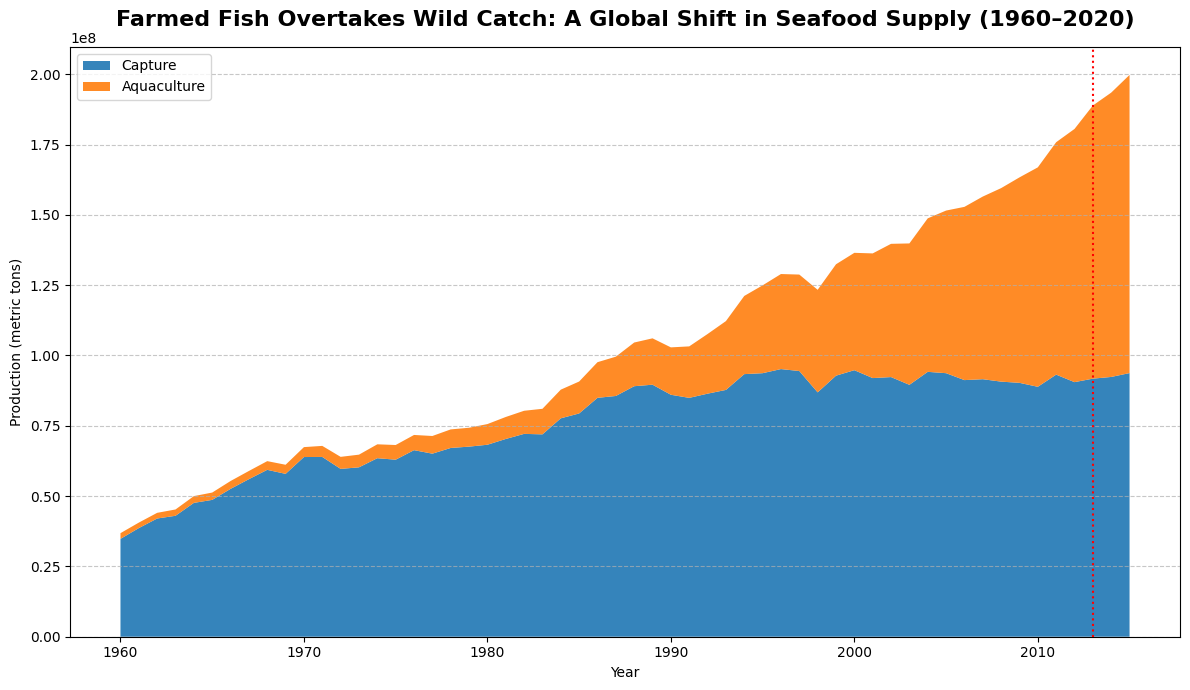

In [ ]:
# Step 3: Load and preprocess data
df = pd.read_csv(file_path)
df = df[df["Entity"] == "World"].copy()
df = df.rename(columns={
    "Aquaculture production (metric tons)": "Aquaculture",
    "Capture fisheries production (metric tons)": "Capture"
})
df = df[["Year", "Capture", "Aquaculture"]].dropna()
df["Total"] = df["Capture"] + df["Aquaculture"]

# Step 4: Plot enhanced chart
plt.figure(figsize=(12, 7))

# Stacked area
plt.stackplot(df["Year"], df["Capture"], df["Aquaculture"],
              labels=["Capture", "Aquaculture"],
              colors=["#1f77b4", "#ff7f0e"],
              alpha=0.9)

# Total line
# plt.plot(df["Year"], df["Total"], color="black", linewidth=2, linestyle="--", label="Total")

# Annotation: year aquaculture surpassed capture
year_surpass = df[df["Aquaculture"] > df["Capture"]].iloc[0]["Year"]
plt.axvline(x=year_surpass, color="red", linestyle=":", linewidth=1.5)
# plt.text(year_surpass + 1, df["Total"].max() * 0.5, "Aquaculture surpasses Capture", rotation=90, fontsize=10)

# Labels
plt.title("Farmed Fish Overtakes Wild Catch: A Global Shift in Seafood Supply (1960–2020)",
          fontsize=16, weight='bold', pad=15)
plt.xlabel("Year")
plt.ylabel("Production (metric tons)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


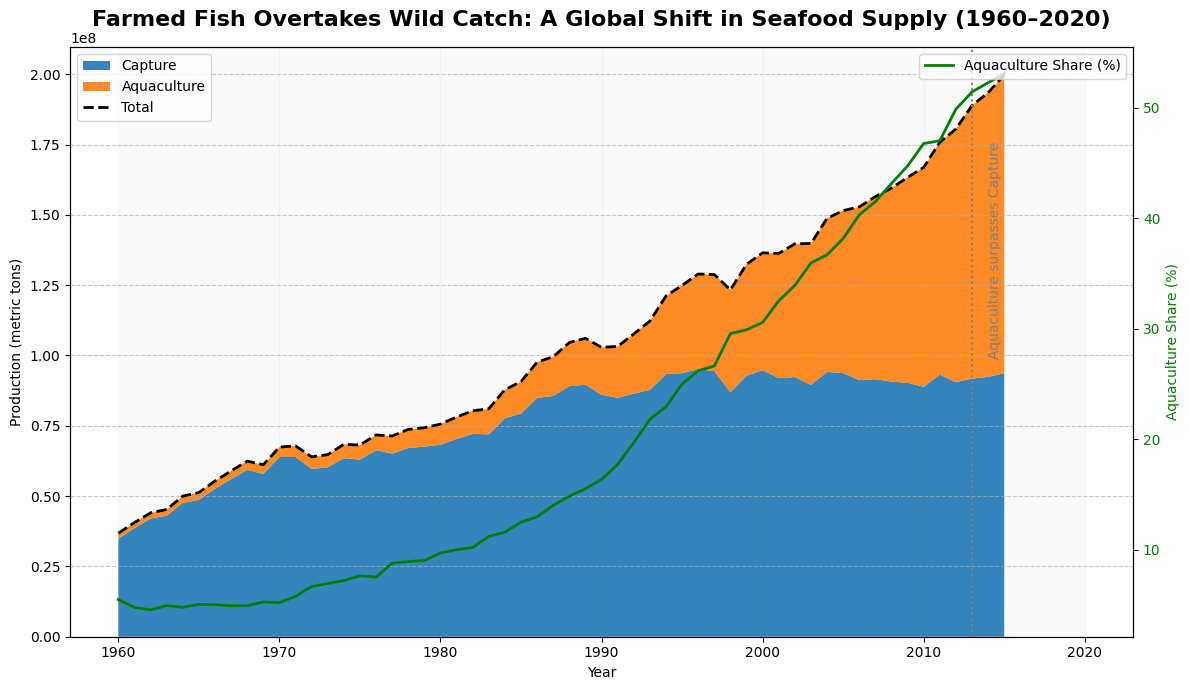

In [ ]:
# Step 3: Load and preprocess
df = pd.read_csv(file_path)
df = df[df["Entity"] == "World"].copy()
df = df.rename(columns={
    "Aquaculture production (metric tons)": "Aquaculture",
    "Capture fisheries production (metric tons)": "Capture"
})
df = df[["Year", "Capture", "Aquaculture"]].dropna()
df["Total"] = df["Capture"] + df["Aquaculture"]
df["Aquaculture Share (%)"] = (df["Aquaculture"] / df["Total"]) * 100

# Step 4: Plot with enhancements
fig, ax1 = plt.subplots(figsize=(12, 7))

# Background bands for decades
for start in range(1960, 2020, 10):
    ax1.axvspan(start, start + 10, color='lightgray', alpha=0.1)

# Stacked area
ax1.stackplot(df["Year"], df["Capture"], df["Aquaculture"],
              labels=["Capture", "Aquaculture"],
              colors=["#1f77b4", "#ff7f0e"], alpha=0.9)

# Total line
ax1.plot(df["Year"], df["Total"], color="black", linewidth=2, linestyle="--", label="Total")

# Annotation: year aquaculture surpassed capture
year_surpass = df[df["Aquaculture"] > df["Capture"]].iloc[0]["Year"]
ax1.axvline(x=year_surpass, color="gray", linestyle=":", linewidth=1.5)
ax1.text(year_surpass + 1, df["Total"].max() * 0.5,
         "Aquaculture surpasses Capture", rotation=90, fontsize=10, color="gray")

# Labels and title
ax1.set_title("Farmed Fish Overtakes Wild Catch: A Global Shift in Seafood Supply (1960–2020)",
              fontsize=16, weight='bold', pad=15)
ax1.set_xlabel("Year")
ax1.set_ylabel("Production (metric tons)")
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(loc="upper left")

# Secondary axis for % share
ax2 = ax1.twinx()
ax2.plot(df["Year"], df["Aquaculture Share (%)"], color='green', linestyle='-', linewidth=2, label="Aquaculture Share (%)")
ax2.set_ylabel("Aquaculture Share (%)", color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

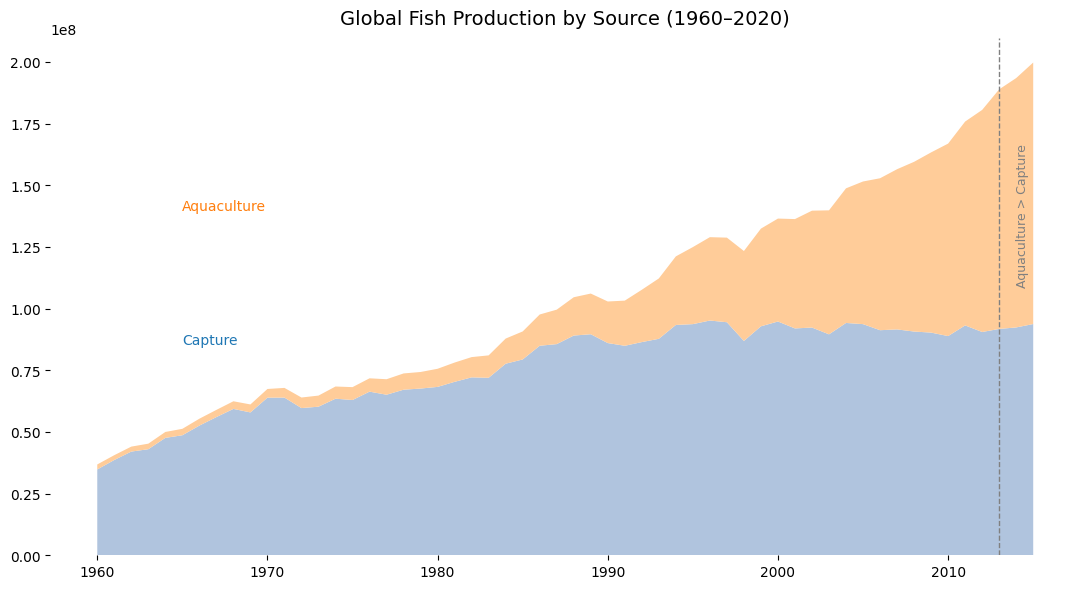

In [ ]:
# Prepare data again
df = pd.read_csv(file_path)
df = df[df["Entity"] == "World"].copy()
df = df.rename(columns={
    "Aquaculture production (metric tons)": "Aquaculture",
    "Capture fisheries production (metric tons)": "Capture"
})
df = df[["Year", "Capture", "Aquaculture"]].dropna()
df["Total"] = df["Capture"] + df["Aquaculture"]

# Convert to numeric arrays
x = df["Year"].astype(int).values
y_capture = df["Capture"].astype(float).values
y_aqua = df["Aquaculture"].astype(float).values

# Minimalist plot
plt.figure(figsize=(11, 6))

# Stacked area
plt.stackplot(x, y_capture, y_aqua,
              colors=["#b0c4de", "#ffcc99"], alpha=1.0)

# Annotation: only turning point
year_surpass = df[df["Aquaculture"] > df["Capture"]].iloc[0]["Year"]
plt.axvline(x=year_surpass, color="gray", linestyle="--", linewidth=1)
plt.text(year_surpass + 1, max(y_capture + y_aqua) * 0.55,
         "Aquaculture > Capture", rotation=90, fontsize=9, color="gray")

# Clean labels
plt.title("Global Fish Production by Source (1960–2020)", fontsize=14, pad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("")
plt.ylabel("")

# Minimal legend
plt.text(1965, max(y_capture)*0.9, "Capture", color="#1f77b4", fontsize=10)
plt.text(1965, max(y_capture + y_aqua)*0.7, "Aquaculture", color="#ff7f0e", fontsize=10)

plt.box(False)
plt.tight_layout()
plt.show()

Intersection point: (2013.0, 94432046.803)


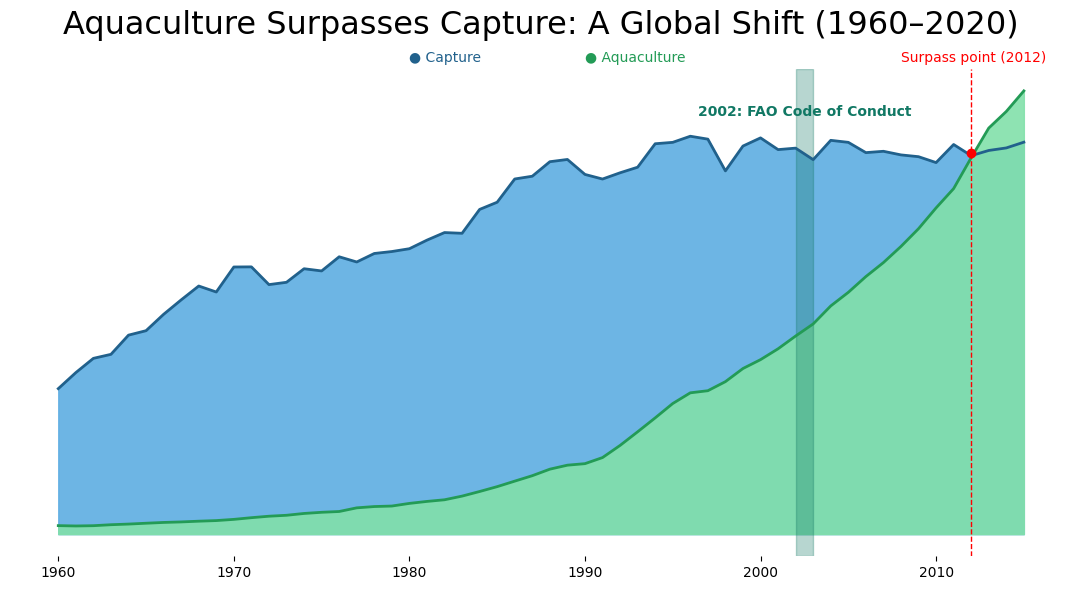

In [ ]:
# Load dataset and filter for World
df = pd.read_csv(file_path)
df = df[df["Entity"] == "World"].copy()
df = df.rename(columns={
    "Aquaculture production (metric tons)": "Aquaculture",
    "Capture fisheries production (metric tons)": "Capture"
})
df = df[["Year", "Capture", "Aquaculture"]].dropna()

# Prepare values
x = df["Year"].astype(int).values
y_capture = df["Capture"].astype(float).values
y_aqua = df["Aquaculture"].astype(float).values

# Define colors
capture_fill = "#5dade2"     # Ocean blue
capture_line = "#21618c"
aqua_fill = "#82e0aa"        # Sustainable green
aqua_line = "#239b56"
event_fill = "#a3e4d7"       # Teal for 2002 event
event_text = "#117864"

# Plot
plt.figure(figsize=(11, 6))

# Fill areas
plt.fill_between(x, y_capture, color=capture_fill, alpha=0.9)
plt.fill_between(x, y_aqua, color=aqua_fill, alpha=0.9)

# Line outlines
plt.plot(x, y_capture, color=capture_line, linewidth=2)
plt.plot(x, y_aqua, color=aqua_line, linewidth=2)

# Mark intersect point
x_cross = df[df["Aquaculture"] > df["Capture"]].iloc[0]["Year"]
y_cross = (df.loc[df["Year"] == x_cross, "Aquaculture"].values[0] +
           df.loc[df["Year"] == x_cross, "Capture"].values[0]) / 2
print(f"Intersection point: ({x_cross}, {y_cross})")

plt.scatter(2012.0, 91102046, color="red", zorder=5)

plt.axvline(x=2012.0, color="red", linestyle="--", linewidth=1)
# plt.text(x_cross + 1, y_cross, "Surpasses Point", fontsize=10, color="gray", rotation=90)
plt.text(x_cross - 5, 113000000, "Surpass point (2012)", fontsize=10, color="red")

# 2002 FAO Code of Conduct band
plt.axvspan(2002, 2003, color=event_text, alpha=0.3)
plt.text(2002.5, 100000000, "2002: FAO Code of Conduct", fontsize=10, color=event_text, fontweight='bold', ha="center")

# Title and inline legend
# plt.title("Aquaculture Surpasses Capture (1960–2020)", fontsize=30, pad=25)
plt.title("Aquaculture Surpasses Capture: A Global Shift (1960–2020)", fontsize=23, pad=25)

label_y = max(y_aqua) * 1.25
# plt.text(1985, label_y, "● Capture", color=capture_line, fontsize=10, ha="right", va="center")
# plt.text(2005, label_y, "● Aquaculture", color=aqua_line, fontsize=10, ha="left", va="center")
plt.text(1980, 113000000, "● Capture", color=capture_line, fontsize=10)
plt.text(1990, 113000000, "● Aquaculture", color=aqua_line, fontsize=10)

# Minimal layout
plt.xticks(fontsize=10)
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.grid(False)
plt.box(False)

plt.tight_layout()
plt.show()